In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

In [2]:
def genKvec(a, n):
    '''
    helper function that generates 2*n + 1 k vectors k=2*pi/a*i, where i = 0, +-1, +-2,
    '''
    k = np.zeros(2*n+1) 
    for i in range(-n, n+1):
        k[i+n] = 2 * np.pi / a * i 
    return k

In [3]:
def genKin(kvec):
    '''
    Helper function that generates matrix for kinetic energy
    '''
    # Initialize matrix with zeros 
    kin = np.zeros([len(kvec), len(kvec)]) 
    for i in range(len(kvec)): 
        kin[i][i] = kvec[i]**2 
    return kin

In [4]:
def genPot(V0, b, a, kvec):
    '''
    Helper function that genertates matrix for potential energy for square potential well
    '''
    # Initialize matrix with zeros
    pot = np.zeros([len(kvec), len(kvec)])
    for i in range(len(kvec)):
        for j in range(len(kvec)):
            if i == j:
                pot[i][j] = -V0 * b / a 
            else:
                pot[i][j] = -V0 /a * np.sin(b * (kvec[i]-kvec[j])/2.0) / ( (kvec[i]-kvec[j])/2.0 )
    return pot

In [12]:
# сделаем большой барьер
V0 = 1
b = 2 
a = 100 
n = 100

def raschet(a, b, V0, n):
    kvec = genKvec(a, n) 
    kin = genKin(kvec)
    pot = genPot(V0=V0, b=b, a=a, kvec=kvec) 
    ham = kin + pot

    e, phi = la.eig(ham)
    phi = phi.T

    elow = np.sort(e, axis=None)[:3]
    i_ground, = np.where(e == elow[0])
    phi_0 = phi[i_ground][0]
    print('Lowest eigenvalues:\t%f\t%f\t%f' % (elow[0], elow[1], elow[2]))
    return(phi_0, kvec, elow[0])

# Задание 1.

Lowest eigenvalues:	-0.183112	0.001113	0.003892
Lowest eigenvalues:	-0.293953	0.001075	0.003888
Lowest eigenvalues:	-0.452679	0.001055	0.003863
Lowest eigenvalues:	-0.453584	0.001055	0.003862
Lowest eigenvalues:	-0.453730	0.001055	0.003861
Lowest eigenvalues:	-0.183112	0.001113	0.003892
Lowest eigenvalues:	-0.364745	0.001064	0.003883
Lowest eigenvalues:	-0.430930	0.001057	0.003875
Lowest eigenvalues:	-0.449236	0.001055	0.003868
Lowest eigenvalues:	-0.452512	0.001055	0.003864
Lowest eigenvalues:	-0.452687	0.001055	0.003862
Lowest eigenvalues:	-0.452866	0.001055	0.003862
Lowest eigenvalues:	-0.453236	0.001055	0.003862
Lowest eigenvalues:	-0.453499	0.001055	0.003862
Lowest eigenvalues:	-0.453580	0.001055	0.003862
Lowest eigenvalues:	-0.453585	0.001055	0.003862
Lowest eigenvalues:	-0.453606	0.001055	0.003862
Lowest eigenvalues:	-0.453651	0.001055	0.003862
Lowest eigenvalues:	-0.453687	0.001055	0.003862
Lowest eigenvalues:	-0.453700	0.001055	0.003862
Lowest eigenvalues:	-0.453700	0.001055	0

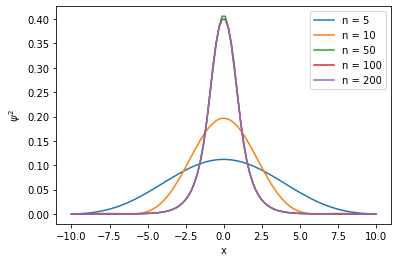

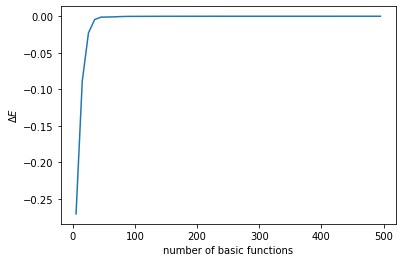

In [100]:
#надо бы что-то написать, чтобы саму функцию получить из коэффициентов
def psy(coef, kvec, x, a):
    s = [0]*len(x)
    for j in range(len(x)):
        for i in range(len(kvec)):
            s[j] += coef[i]*math.cos(kvec[i]*x[j])*a**(-0.5)
    return(s)
def potential(x, b):
    pot = [0]*len(x)
    for i in range(len(x)):
        if -b/2 < x[i] < b/2:
            pot[i] = -V0
    return(pot)
l = 10
n = [5, 10, 50, 100, 200]
x = np.linspace(-l, l, 100)
for k in n:
    c, d, e = raschet(100, 2, 1, k)
    plt.xlabel('x')
    plt.ylabel('$\psi^2$')
    plt.plot(x, normalizewf(np.power(psy(c, d, x, 100), 2), x), label = 'n = '+str(k))
    plt.legend()
n = [i for i in range(5, 500, 10)]
delta_e = []
for k in n:
    c, d, e = raschet(100, 2, 1, k)
    delta_e.append(-0.4538-e)
plt.figure()
plt.xlabel('number of basic functions')
plt.ylabel('$\Delta E$')
plt.plot(n, delta_e)
#plt.plot(x, potential(x, b))

Из графика зависимости квадрата волновой функции от координаты, мы видим, что при достижении определенного значения n волновая фунция практически не меняется. Такой же результат наблюдается и на графике зависимости разности энергий аналитичексого и численного решений: существует некоторое n начиная, с которого можем утверждать, что система базисных функций практически достигла полноты и следовательно очень хорошо описывает нашу в.ф.

Lowest eigenvalues:	-99999997.313737	-99999989.240977	-99999975.818708
2.686263397336006


No handles with labels found to put in legend.


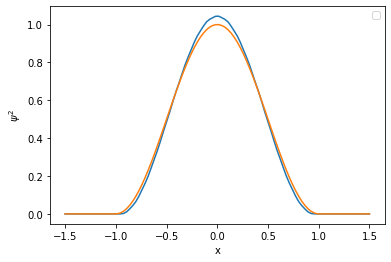

In [106]:
#бесконечно глубокая яма
def normalizewf(psi2, x):
    return(psi2/simps(psi2, x))
c, d, e = raschet(100, 2, 10**8, 1000)
print(10**8+e)
l = 1.5
x = np.linspace(-l, l, 100)
psy1 = []
for i in range(len(x)):
    if -1 < x[i] < 1:
        psy1.append(np.power(np.cos(np.pi*x[i]/2), 2))
    else:
        psy1.append(0)
plt.plot(x, normalizewf(np.power(psy(c, d, x, 100), 2), x))
plt.xlabel('x')
plt.ylabel('$\psi^2$')
plt.plot(x, normalizewf(psy1, x))
plt.legend()
#plt.plot(x, potential(x, 2))

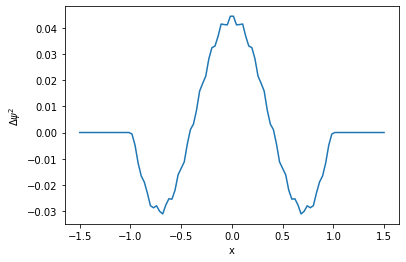

In [109]:
plt.show()
plt.xlabel('x')
plt.ylabel('$\Delta\psi^2$')
plt.plot(x, (normalizewf(np.power(psy(c, d, x, 100), 2), x)-normalizewf(psy1, x)))

Для ямы с бесконечными стенками n = 1000 не является достаточным, как мы наблюдаем из достаточно большой погрешности в.ф. Точное значение собственного значения энергии E = 2.46740, тогда как численное E = 2.68626.

# Задание 2.

Lowest eigenvalues:	-0.701882	3.575003	3.884180
Lowest eigenvalues:	-0.521178	1.191734	1.239964
Lowest eigenvalues:	-0.456415	0.197450	0.330124
Lowest eigenvalues:	-0.453730	0.004520	0.015116
Lowest eigenvalues:	-0.453584	0.001055	0.003862


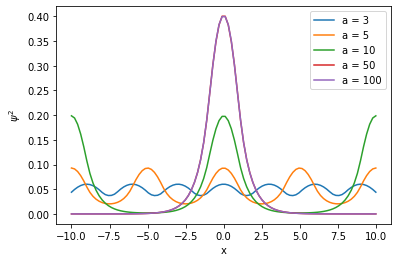

In [105]:
a = [3, 5, 10, 50, 100]
l = 10
x = np.linspace(-l, l, 100)
for i in range(len(a)):
    c, d, e = raschet(a[i], 2, 1, 100)
    plt.xlabel('x')
    plt.ylabel('$\psi^2$')
    plt.plot(x, normalizewf(np.power(psy(c, d, x, a[i]), 2), x), label = 'a = '+str(a[i]))
    plt.legend()

Данные результаты мы обсуждали на лекции. При а близком к б, мы получаем другую задачу, а именно периодический потенциал, в.ф. разных ям накладываются друг на друга, частица может туннелировать из одной ямы в другую. Мы получаем периодическую фолновую функцию, причем собственные значения энергии в этом случае меньше, за счет того, что у частицы теперь есть больше свободы и соответственно способов понизить энергию. Когда в.ф. перестают накладываться друг на друга, мы уже решаем задачу об изолированном потенциале и начиная с какого-то а, в.ф. не меняются. 

# Задание 3.

Lowest eigenvalues:	-97.960902	-91.859064	-81.746931


No handles with labels found to put in legend.


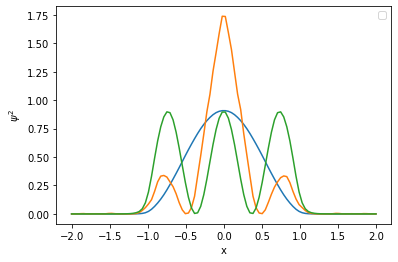

In [112]:
def raschet1(a, b, V0, n):
    kvec = genKvec(a, n) 
    kin = genKin(kvec)
    pot = genPot(V0=V0, b=b, a=a, kvec=kvec) 
    ham = kin + pot

    e, phi = la.eig(ham)
    phi = phi.T

    elow = np.sort(e, axis=None)[:3]
    i_ground, = np.where(e == elow[0])
    i_ground1, = np.where(e == elow[1])
    i_ground2, = np.where(e == elow[2])
    phi_0 = phi[i_ground][0]
    phi_1 = phi[i_ground1][0]
    phi_2 = phi[i_ground2][0]
    print('Lowest eigenvalues:\t%f\t%f\t%f' % (elow[0], elow[1], elow[2]))
    return(phi_0, phi_1, phi_2, kvec, elow[0])
phi_0, phi_1, phi_2, d, e = raschet1(100, 2, 100, 500)
l = 2
x = np.linspace(-l, l, 100)
plt.plot(x, normalizewf(np.power(psy(phi_0, d, x, 100), 2), x))
plt.plot(x, normalizewf(np.power(psy(phi_1, d, x, 100), 2), x))
plt.plot(x, normalizewf(np.power(psy(phi_2, d, x, 100), 2), x))
plt.xlabel('x')
plt.ylabel('$\psi^2$')
plt.legend()


При большой глубине ямы мы получаем в.ф. возбужденного состояния очень похожие на то, что получается в аналитическом решении. Но вариационный принцип дает правильные результаты только для основного состояния. 